### DS4E-S21: Portfolio assignment: Part 2
*Optional: Add a cell below this one to give your portfolio assignment its own title!*

### Instructions summary

*Note: These are summarized instructions only. For the full assignment instructions, see the **[instructions document](https://docs.google.com/document/d/1z9xokYh49CiThWsUo-rNsVnUv76UKlBrsiob8hZ425w/edit?usp=sharing)**.*

This two-part portfolio assignment is an opportunity to apply the skills and concepts from class to real-world data, as well as to experience the joys (and occasionally other emotions!) of conducting original data science research. 

In **Part 2**, you'll evaluate your data in terms of ethics, conduct correlation, regression, and clustering analyses of your data, discuss your findings, and imagine possible next steps in your research.

To complete Part 2, answer the following questions using your dataset. We recommend using the same dataset you used for Part 1, but it is not required. If you are using your own dataset, and it is not the same dataset you used for Part 1, you must get permission from your TA prior to submission. Remember that **all code** must be commented clearly and thoroughly. You may use as many cells as you wish to answer each question.

Part 2 must be submitted through JupyterHub by **Monday**, **May 3**, at **9am ET**.

In [453]:
'''Import libraries, packages, file, and modules'''
# packages for dataframes, arrays, and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# stats models 
import statsmodels.api as sm                    
import statsmodels.formula.api as smf  
import scipy.stats as sp                             # for p-values and correlations
# SciKit Learn packages
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.preprocessing import StandardScaler     # feature scaling
from sklearn import metrics                          # for evaluation metrics

from sklearn.linear_model import LinearRegression    # linear regression
from sklearn.neighbors import KNeighborsClassifier   # knn
from sklearn.cluster import KMeans                   # kmeans

from kneed import KneeLocator                        # elbow score
ramen_data = pd.read_csv('ramen-ratings.csv')        # csv of ramen ratings data

### Question 1

Describe any potential ethical concerns related to the data. Give an example of a variable that is NOT included in the dataset but that would raise ethical concerns if it were. Explain your reasoning.

An ethical concern about this dataset is that it might be subtley promoting certain ramen (with high ratings) which might be bad for one's health. Many ramen include MSG, which is known for its detrimental affects, but given this dataset, people will not be aware of this. It might violate the principle of Beneficience. If the variable of reviewer's name that was included without asking for permission, then it would bring up ethical conerns because they would not have informed consent to having their names be included in the dataset and publicly displayed. It would violate the principle of Respect for Persons.

## Linear Relationships

*Questions 2 through 5 relate to linear relationships between variables in your data.*

### Question 2

Name two variables from your dataset (these can be variables you described in Part 1, but don’t have to be). Calculate the correlation between them. 

*Note: It is okay if the variables you select do not turn out to be correlated or if they are negatively correlated.*

Two variables from my dataset are: Style and Stars, or the type of container the ramen comes in and the ratings (out of 5.0) of the ramen.

In [454]:
ramen_data.head() #checking dataset out

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [455]:
ramen_data.dtypes #seeing the data type for each variable - tells us what we need to change

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [456]:
#take out observations where there is no rating or style isn't recorded, turn Stars variable into float - numeric discrete
ramen_data = ramen_data[ramen_data["Stars"] != "Unrated"]
ramen_data = ramen_data[ramen_data["Style"] != "Unrated"].astype(str)
ramen_data = ramen_data[ramen_data["Style"] != "Unrated"]
ramen_data = ramen_data[ramen_data["Style"] != "nan"]
ramen_data["Stars"] = ramen_data["Stars"].astype(float)
ramen_data.dtypes

Review #     object
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
Top Ten      object
dtype: object

In [457]:
ramen_data["Style"].value_counts() #each type of ramen

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

In [458]:
# taking out ramen ratings for bar and can, because there is only 1 observation for each - doesn't tell us anything
ramen_data_new = ramen_data[ramen_data["Style"] != "Bar"].copy()
ramen_data_new = ramen_data_new[ramen_data_new["Style"] != "Can"]

In [459]:

#Making a new column, that shows the style as an int (key is shown below), so that we can calc corr

styles_stars = dict()
# iterate over unique style types
for val in ramen_data_new['Style'].unique():
    # get the subset of just this style type
    sub = ramen_data_new[ramen_data_new['Style'] == val] 
    
    avg_rev = np.mean(sub['Stars'])  # calc avg ratings
    styles_stars[val] = round(avg_rev, 2) # save to dictionary, rounding to 2 decimals
    
# sort the dictionary by values (average stars)
styles_stars_sorted = dict(sorted(styles_stars.items(), key=lambda item: item[1]))

# Next, create a new dictionary {style : rating}
# the keys will the categories from "Style" and the values will be our new labeling
rank_order = dict((name, val) for val, name in enumerate(styles_stars_sorted.keys()))

# Add this as a column to our dataframe
# Using the dictionary to map 'Style' values
ramen_data_new['Style Type Int'] = ramen_data_new['Style'].map(rank_order)

print("Key for Style Type Int:",rank_order) #in the Style Type Tnt column, showing what each int represents (certain style)
# look at our dataframe
ramen_data_new

Key for Style Type Int: {'Cup': 0, 'Tray': 1, 'Bowl': 2, 'Pack': 3, 'Box': 4}


,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Style Type Int
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,nan,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,nan,3
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,nan,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,nan,3
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,nan,3
...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,nan,2
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,nan,3
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,nan,3
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00,nan,3


In [460]:
ramen_data_new.dtypes #checking data type of each variable to make sure Styles int and Stars are numeric (to use in future calculations)

Review #           object
Brand              object
Variety            object
Style              object
Country            object
Stars             float64
Top Ten            object
Style Type Int      int64
dtype: object

In [461]:
corr = ramen_data_new.corr()
corr #shows correlation between each pair of variables (table format)

,Stars,Style Type Int
Stars,1.000000,0.077185
Style Type Int,0.077185,1.000000


In [462]:
corr, pval = sp.pearsonr(ramen_data_new['Style Type Int'], ramen_data_new['Stars']) #calculated corr and p-val of variables Style (numeric version) and Stars in dataset
print('The Correlation between Style and Stars is: {:.2}'.format(corr)) #prints out line stating correlation (2 sig figs) 

The Correlation between Style and Stars is: 0.077


### Question 3

Calculate a linear regression between one dependent variable from your dataset and at least one independent variable from your dataset (these can be the same variables as in Q2). 

In [463]:
results = smf.ols('Stars ~ Style', data=ramen_data_new).fit() # estimate our OLS regression!
results.summary()                                           # print the output!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Stars   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.393
Date:                Wed, 05 May 2021   Prob (F-statistic):            0.00153
Time:                        03:19:09   Log-Likelihood:                -3681.7
No. Observations:                2573   AIC:                             7373.
Df Residuals:                    2568   BIC:                             7403.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6707      0.046     79.470      0.000       3.580       3.761
Style[T.Box]      0.6210      0.416      1.492      0.136      -0.195       1.437
Style[T.Cup]     -0.1722      0.066     -2.592      0.010      -0.302      -0.042
Style[T.Pack]     0.0298      0.053      0.562      0.574      -0.074       0.134
Style[T.Tray]    -0.1255      0.108     -1.164      0.245      -0.337       0.086
==============================================================================
Omnibus:                      451.503   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.540
Skew:                          -1.085   Prob(JB):                    6.05e-182
Kurtosis:                       4.754   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 4

Plot your data with your independent variable on the x-axis and the dependent variable on the y-axis. Plot a line indicating the fit of your regression. You may use built-in functions to calculate this line.

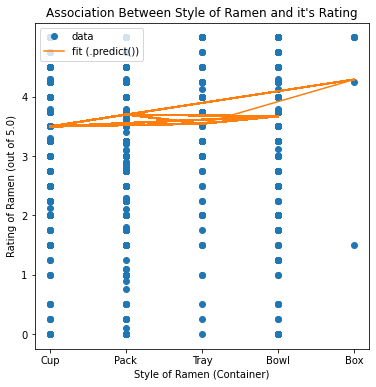

In [464]:
X = ramen_data_new['Style'] # observed x-values
# calculate fit line:
y_pred2 = results.predict(ramen_data_new['Style'])
# Plot
plt.figure(figsize=(6,6)) # make square!

# plot data
plt.plot(ramen_data_new['Style'], ramen_data_new['Stars'],
        marker='o', lw=0, # no line, only markers
        label = 'data')

# plot fit line
plt.plot(X, y_pred2,
        label='fit (.predict())')

# set the axes to have the same range
plt.yticks(range(5))

# label axes & title
plt.xlabel('Style of Ramen (Container)')
plt.ylabel('Rating of Ramen (out of 5.0)')

plt.title("Association Between Style of Ramen and it's Rating")
plt.legend(loc='upper left')

plt.show()

### Question 5

Interpret the results from Q3 and Q4. How does a change in the independent variable relate to a change in the dependent variable? Is that relationship significant? Are there omitted variables which may be biasing these results?

There is no significant relationship between style of ramen and it's rating. A change in the independent variable does not necessarily mean there is a change in the dependent variable (for almost every pack of ramen, there is a range of ratings from 0 to 5). I omitted the bar and can observations which might show a certain preference for those types of ramen. Style of ramen is not a good predictor of the stars it gets

## Clustering

*Questions 6 through 9 relate to k-means clustering.*

### Question 6

Use `sklearn` to write a function that calculates k-means clustering for an arbitrary value of k. Your function should return the fitted estimator.

In [465]:
def calc_kmeans(k, scaled_features):
    kmeans = KMeans(n_clusters=k,random_state=42) # init k-means object
    kmeans.fit(scaled_features)  # run k-means
    return kmeans

### Question 7

Plot the Sum of the Squared Error (SSE) for 1-10 clusters using the function you wrote in Q6. Use the “elbow method” to identify a number of clusters appropriate for your data. Be sure to scale your data before calculating the SSE.

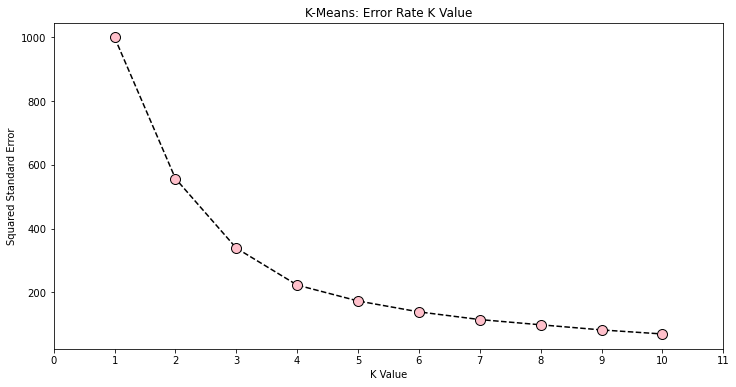

In [491]:
# prepare data: choose 500 random rows
idx = np.random.randint(len(ramen_data_new), size=500)
X = ramen_data_new.loc[idx][['Style Type Int', 'Stars']].values
# z-scores: (scaling data)
scaler = StandardScaler() 
scaled_features = scaler.fit_transform(X)

error = list()  # to save sse
for clus in range(1,11): 
    kmeans = calc_kmeans(clus,scaled_features)
    error.append(kmeans.inertia_) # save sum of squared error (SSE)
# "Elbow Method" plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(error)+1), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
#title, x-axis, y-axis labels
plt.xticks(np.arange(0, 12, 1))
plt.title('K-Means: Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Squared Standard Error')
plt.show()

In [492]:
#find where curve starts, or elbow score to find right amount of clusters
kl = KneeLocator(range(1, 11), error, 
                 curve="convex", direction="decreasing")
print("Elbow method suggests", kl.elbow, "clusters are appropiate for my data.")

Elbow method suggests 4 clusters are appropiate for my data.


### Question 8

Plot the Silhouette Coefficient for 2-10 clusters using the function you wrote in Q6. Be sure to scale your data before calculating the Silhouette Coefficient. How many clusters does this method suggest is optimal? NOTE: Depending on your data, Q7 and Q8 may not yield the same number of clusters.

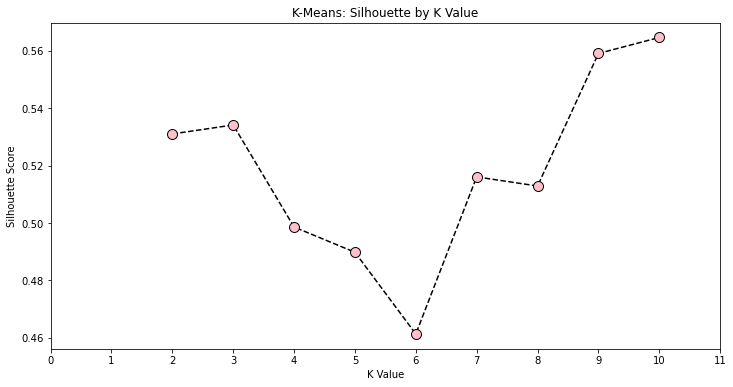

In [495]:
silhouette = list() # silhouette score
#sil. coef. for 2-10 clusters
for clus in range(2,11):
    kmeans = calc_kmeans(clus,scaled_features)
    score = metrics.silhouette_score(scaled_features, kmeans.labels_) # calc silhouette score
    silhouette.append(score) # save score

# Silhouette score plot

plt.figure(figsize=(12, 6))
plt.plot(range(2, len(silhouette)+2), silhouette, color='black', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10)
#title, x avis, y axis labels
plt.xticks(np.arange(0, 12, 1))
plt.title('K-Means: Silhouette by K Value')
plt.xlabel('K Value')
plt.ylabel('Silhouette Score')
plt.show()

In [501]:
#use elbow method to find number of clusters to use for silhouette 
num_clus = 5
print( num_clus, "clusters are appropiate for my data.")

5 clusters are appropiate for my data.


### Question 9

Use your answers to Q7 & Q8 to select a reasonable value for k (must be at least 2). Calculate cluster assignments for each of your observations using your function from Q6. Use two variables from your dataset to plot your data in two dimensional space (ie, variable 1 x variable 2). Color code your data based on cluster assignments.

Key: {'Cup': 0, 'Tray': 1, 'Bowl': 2, 'Pack': 3, 'Box': 4}


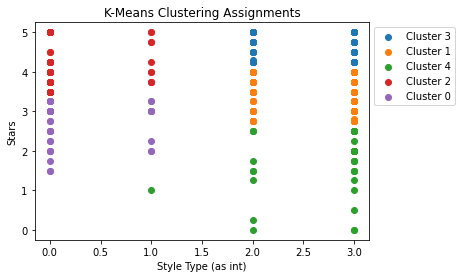

In [500]:
kmeans = calc_kmeans(num_clus,scaled_features) #kmeans for 5 clusters
# empty list to put seperated values
x = list()
y = list()
cluster = list()

# iterate over X and seperate values
for i, (style, stars) in enumerate(X):
    x.append(style)
    y.append(stars)
    cluster.append(kmeans.labels_[i]) # cluster assignment for this observation
    
# turn this all into a data frame
clust_df = pd.DataFrame({'Style Type Int':x, 'Stars':y, 'Cluster':cluster})

# plot clusters
lst=[]
# iterate over unique clusters
for clust in clust_df['Cluster'].unique():
    sub = clust_df[clust_df['Cluster'] == clust] # make subset with just this cluster
    # plot it
    plt.scatter(sub['Style Type Int'], sub['Stars'], label='Cluster {}'.format(clust))

# title, x-axis, y-axis labels, legend
plt.title('K-Means Clustering Assignments')
plt.xlabel('Style Type (as int)') 
plt.ylabel('Stars')
plt.legend(bbox_to_anchor=(1,1))
print("Key:",rank_order)
plt.show()

## Conclusion

*Question 10 can draw on any of the analyses done in Q1-Q9.*

### Question 10

What did you learn from this dataset? Your answer may (but is not required to) address any of the following questions: Does a linear model appear to be a good fit for your data? Does your data appear to cluster in a meaningful way? What limitation do you see to this dataset? What additional analyses might be interesting (Describe, you don’t need to do these)? 

From this dataset, I learned that there is a weak correlation between ramen styles and stars (from the observations in the ramen dataset). Limitations in my dataset include the difference in number of observations for each ramen style. Some styles only had a few or 1 data point, and did not tell us anything about the relationship between the two variables. Our R^2 is 0.007, telling us that this linear model is probably not a good fit to the data. The clustering has no pattern to it, so it does not tell us much, either.